In [33]:
import pyspark
from pyspark.sql import SparkSession

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix

In [76]:
spark = SparkSession.builder.appName("Divar").getOrCreate()

In [3]:
spark

<h1>Load & Analysis Data</h1>

In [98]:
df=spark.read.csv('DivarFinal.csv',inferSchema=True,header=True)

In [99]:
df.printSchema()

root
 |-- Address: string (nullable = true)
 |-- Area: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Number Of Room: integer (nullable = true)
 |-- Price: long (nullable = true)
 |-- Price per meter: integer (nullable = true)
 |-- Floor: integer (nullable = true)
 |-- Elevator: integer (nullable = true)
 |-- Parking: integer (nullable = true)
 |-- Warehouse: integer (nullable = true)



In [100]:
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,Address,string
1,Area,int
2,Year,int
3,Number Of Room,int
4,Price,bigint
5,Price per meter,int
6,Floor,int
7,Elevator,int
8,Parking,int
9,Warehouse,int


In [12]:
df.show()

+-------------+----+----+--------------+------------+---------------+-----+--------+-------+---------+
|      Address|Area|Year|Number Of Room|       Price|Price per meter|Floor|Elevator|Parking|Warehouse|
+-------------+----+----+--------------+------------+---------------+-----+--------+-------+---------+
|     کوی بیمه| 105|1395|             2|  4100000000|       39048000|    4|       1|      1|        1|
|      فرمانیه| 755|1398|             4|150000000000|      198675000|   10|       1|      1|        1|
|         پونک|  68|1381|             2|  2460000000|       36176000|    1|       0|      1|        1|
|     کوی بیمه|  88|1396|             2|  3200000000|       36364000|    5|       1|      1|        1|
|        پردیس| 135|1398|             3|  2500000000|       18519000|    0|       1|      1|        1|
|     کوی بیمه|  76|1400|             2|  3530000000|       46447000|    5|       1|      1|        1|
|       بریانک|  53|1395|             1|  1100000000|       20755000|    

In [13]:
df.summary().show()

+-------+---------+-----------------+------------------+------------------+-------------------+--------------------+------------------+-------------------+-------------------+-------------------+
|summary|  Address|             Area|              Year|    Number Of Room|              Price|     Price per meter|             Floor|           Elevator|            Parking|          Warehouse|
+-------+---------+-----------------+------------------+------------------+-------------------+--------------------+------------------+-------------------+-------------------+-------------------+
|  count|    11099|            11099|             11099|             11099|              11099|               11099|             11099|              11099|              11099|              11099|
|   mean|     null|99.34606721326246|1391.0784755383368|1.9854941886656456|4.795949024777998E9|3.9099409045859985E7| 3.231372195693306| 0.7560140553202991| 0.8016037480854131| 0.8944049013424633|
| stddev|     null|1

In [29]:
df.describe().toPandas()

,summary,Address,Area,Year,Number Of Room,Price,Price per meter,Floor,Elevator,Parking,Warehouse
0,count,11099,11099,11099,11099,11099,11099,11099,11099,11099,11099
1,mean,None,99.34606721326246,1391.0784755383368,1.9854941886656456,4.795949024777998E9,3.9099409045859985E7,3.231372195693306,0.7560140553202991,0.8016037480854131,0.8944049013424633
2,stddev,None,101.4214444933649,7.463569524644848,0.7261970105071273,9.350470864662762E9,3.311463067414841E7,2.7846643240255013,0.42950369521486437,0.39881011674284683,0.30733252979235315
3,min,آبشار,3,1370,0,100000000,2000000,-1,0,0,0
4,max,یوسف‌آباد,8200,1400,4,400000000000,1000000000,30,1,1,1


In [51]:
pd.DataFrame(df.take(10), columns=df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
Address,کوی بیمه,فرمانیه,پونک,کوی بیمه,پردیس,کوی بیمه,بریانک,سازمان برنامه,جی,پونک
Area,105,755,68,88,135,76,53,87,50,78
Year,1395,1398,1381,1396,1398,1400,1395,1380,1378,1384
Number Of Room,2,4,2,2,3,2,1,2,1,2
Price,4100000000,150000000000,2460000000,3200000000,2500000000,3530000000,1100000000,2275000000,740000000,3000000000
Price per meter,39048000,198675000,36176000,36364000,18519000,46447000,20755000,26149000,14800000,38462000
Floor,4,10,1,5,0,5,3,4,1,3
Elevator,1,1,0,1,1,1,1,0,0,0
Parking,1,1,1,1,1,1,1,1,0,1
Warehouse,1,1,1,1,1,1,1,1,1,1


In [15]:
df.count()

11099

In [24]:
for col in df.columns:
    print(col, "with null values: ", df.filter(df[col].isNull()).count())

Address with null values:  0
Area with null values:  0
Year with null values:  0
Number Of Room with null values:  0
Price with null values:  0
Price per meter with null values:  0
Floor with null values:  0
Elevator with null values:  0
Parking with null values:  0
Warehouse with null values:  0


<h3>Find number of unique Elements in Data.</h3>

In [39]:
for col in df.columns:
    print(col, "with unique values: ", df.select(col).distinct().count())


Address with unique values:  331
Area with unique values:  293
Year with unique values:  31
Number Of Room with unique values:  5
Price with unique values:  1734
Price per meter with unique values:  5406
Floor with unique values:  29
Elevator with unique values:  2
Parking with unique values:  2
Warehouse with unique values:  2


<h3>House with less than 5 years of construction.</h3>

In [43]:
print("Number of houses with less than 5 years of construction:",df.filter(df['Year'] > 1396).count())

Number of houses with less than 5 years of construction: 3421


<h3>groupby Price per meter </h3>

In [46]:
gp = df.groupBy("Price per meter").count()
gp.show(10)

+---------------+-----+
|Price per meter|count|
+---------------+-----+
|       38846000|    1|
|       22692000|    1|
|       69048000|    1|
|      144231000|    1|
|       20154000|    2|
|        7907000|    2|
|       27200000|    1|
|       52970000|    1|
|       10460000|    2|
|       52023000|    1|
+---------------+-----+
only showing top 10 rows



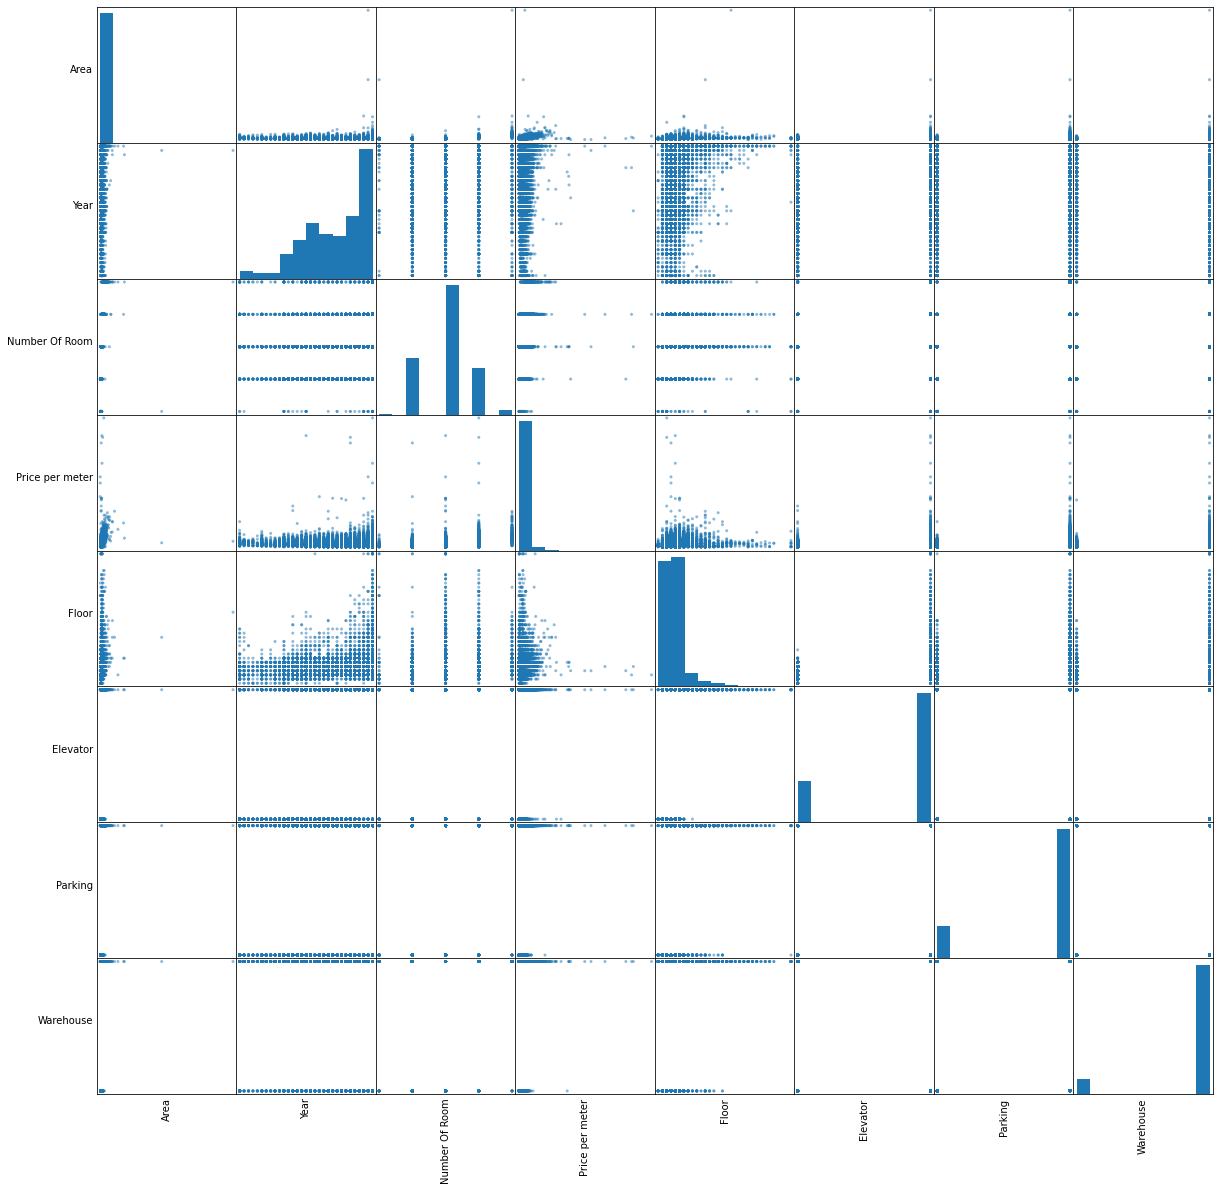

In [62]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
numeric_data = df.select(numeric_features).toPandas()
axs = scatter_matrix(numeric_data, figsize=(20, 20));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

<h3>Correlation between variables and Price</h3>

In [104]:
import six
for i in df.columns:
    if not( isinstance(df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Price for ", i, df.stat.corr('Price',i))

Correlation to Price for  Area 0.7555067853354276
Correlation to Price for  Year 0.09793148348221639
Correlation to Price for  Number Of Room 0.441740838180093
Correlation to Price for  Price 1.0
Correlation to Price for  Price per meter 0.6685283685925187
Correlation to Price for  Floor 0.11635796095307302
Correlation to Price for  Elevator 0.18243529886190868
Correlation to Price for  Parking 0.18197819547911698
Correlation to Price for  Warehouse 0.11533357589949349


<h3>Linear Regression model</h3>

In [105]:
from pyspark.ml.feature import VectorAssembler


In [108]:
vectorAssembler = VectorAssembler(inputCols = ["Area", "Year", "Number Of Room", "Price per meter", "Floor", "Elevator"\
                                              , "Parking", "Warehouse"], outputCol = 'features')
vector_df = vectorAssembler.transform(df)
vector_df = vector_df.select(['features', 'Price'])
vector_df.show(3)

+--------------------+------------+
|            features|       Price|
+--------------------+------------+
|[105.0,1395.0,2.0...|  4100000000|
|[755.0,1398.0,4.0...|150000000000|
|[68.0,1381.0,2.0,...|  2460000000|
+--------------------+------------+
only showing top 3 rows



In [110]:
splits = vector_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [111]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Price', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [55519981.60395409,56156408.51921113,97311559.50558382,151.4669546009377,78477278.79922207,-1393224908.369517,-1395484584.2642112,-476843016.4153281]
Intercept: -82610418566.21548


In [112]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4310733047.093077
r2: 0.807876


In [113]:
train_df.describe().show()

+-------+-------------------+
|summary|              Price|
+-------+-------------------+
|  count|               7729|
|   mean|4.789614733601372E9|
| stddev|9.835329280659582E9|
|    min|          180000000|
|    max|       400000000000|
+-------+-------------------+



In [114]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","Price","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Price",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+--------------------+----------+--------------------+
|          prediction|     Price|            features|
+--------------------+----------+--------------------+
|-8.449963331140137E7| 700000000|(8,[0,1,2,3],[33....|
| 4.482881163948059E7| 780000000|(8,[0,1,2,3],[40....|
|-4.35730731130676...| 700000000|(8,[0,1,2,3],[41....|
|1.7560257537230377E9|1220000000|(8,[0,1,2,3],[45....|
|  9.78696014181366E8|1100000000|(8,[0,1,2,3],[50....|
+--------------------+----------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.818893


In [115]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 3.45991e+09


In [116]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","Price","features").show()

+--------------------+----------+--------------------+
|          prediction|     Price|            features|
+--------------------+----------+--------------------+
|-8.449963331140137E7| 700000000|(8,[0,1,2,3],[33....|
| 4.482881163948059E7| 780000000|(8,[0,1,2,3],[40....|
|-4.35730731130676...| 700000000|(8,[0,1,2,3],[41....|
|1.7560257537230377E9|1220000000|(8,[0,1,2,3],[45....|
|  9.78696014181366E8|1100000000|(8,[0,1,2,3],[50....|
|1.0518546936572723E9|1050000000|(8,[0,1,2,3],[50....|
| 6.521667330247726E9|2800000000|(8,[0,1,2,3],[50....|
|4.2159902132902527E8| 390000000|(8,[0,1,2,3],[60....|
| 9.843317517890625E8| 450000000|(8,[0,1,2,3],[86....|
|3.1286764227933655E9|1500000000|(8,[0,1,2,3],[100...|
|3.8398430052119446E9|2050000000|(8,[0,1,2,3],[104...|
| 4.296181613412689E9|1850000000|(8,[0,1,2,3],[110...|
| 3.778378080218048E8| 580000000|(8,[0,1,3],[30.0,...|
|2.4187725779639587E9|1100000000|(8,[0,1,3,4],[30....|
|-3.69283560735168...| 635000000|(8,[0,1,3,4],[31....|
| 2.581757